In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
# Replace 'accident_data.csv' with the path to your dataset
df = pd.read_csv("D:\\intership tasks\\road_accident.csv")


In [13]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: drop rows with missing values)
df = df.dropna()

# Convert 'AccidentDate' to datetime
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'], format='%Y-%m-%d')

# Extract hour information from 'Timing'
# Example: Convert 'Morning' to 8 AM and 'Night' to 8 PM for simplicity

df['DayOfWeek']=df['AccidentDate'].dt.day_name()
df['Month']=df['AccidentDate'].dt.month_name()

# Display the DataFrame
print(df)

  AccidentDate     Timing          State WeatherCondition       RoadCondition   
0   2013-02-04    Morning  Uttar Pradesh            Rainy  Under Construction  \
1   2005-02-23      Night        Tripura            Clear  Under Construction   
2   2014-10-08  Afternoon         Odisha            Clear                Fine   
3   2015-01-14      Night      Jharkhand            Rainy               Rough   
4   2006-01-17  Afternoon         Kerala            Clear                Fine   

   Deaths              Reason  
0      10       Drunk Driving  
1       3  Weather Conditions  
2       6     Poor Visibility  
3       8     Road Conditions  
4       2            Speeding  
AccidentDate        0
Timing              0
State               0
WeatherCondition    0
RoadCondition       0
Deaths              0
Reason              0
dtype: int64
      AccidentDate     Timing          State WeatherCondition   
0       2013-02-04    Morning  Uttar Pradesh            Rainy  \
1       2005-02-23      

C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_19492\3755867033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Timing', data=df, palette='viridis')


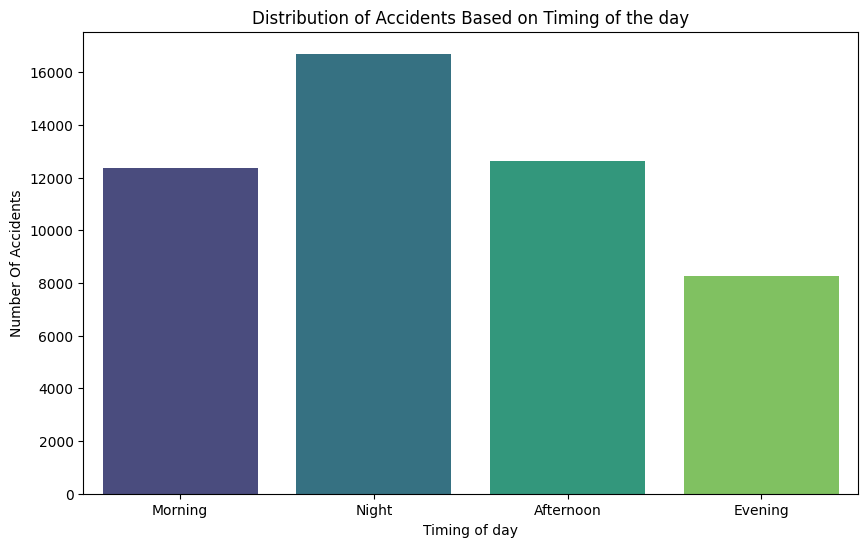

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Timing', data=df, palette='viridis')
plt.title('Distribution of Accidents Based on Timing of the day')
plt.xlabel('Timing of day')
plt.ylabel('Number Of Accidents')
plt.show()

C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_19492\3093067832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


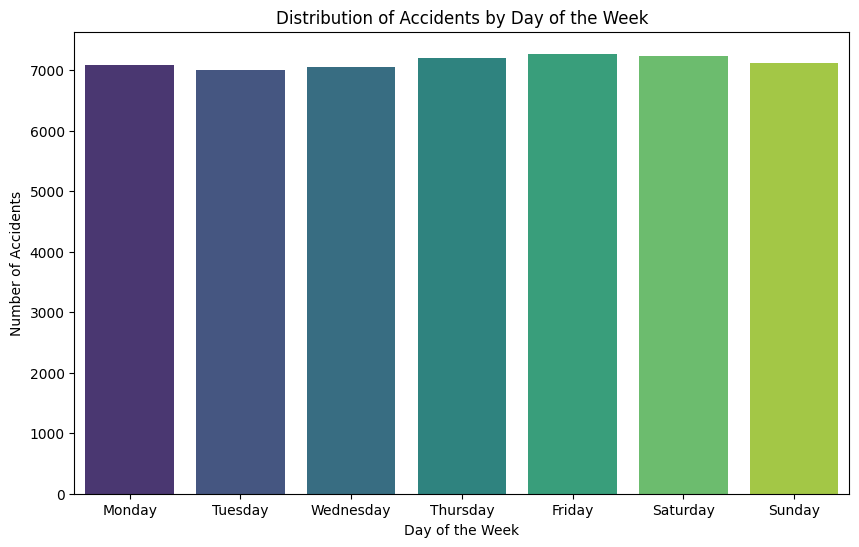

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_19492\3780293661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


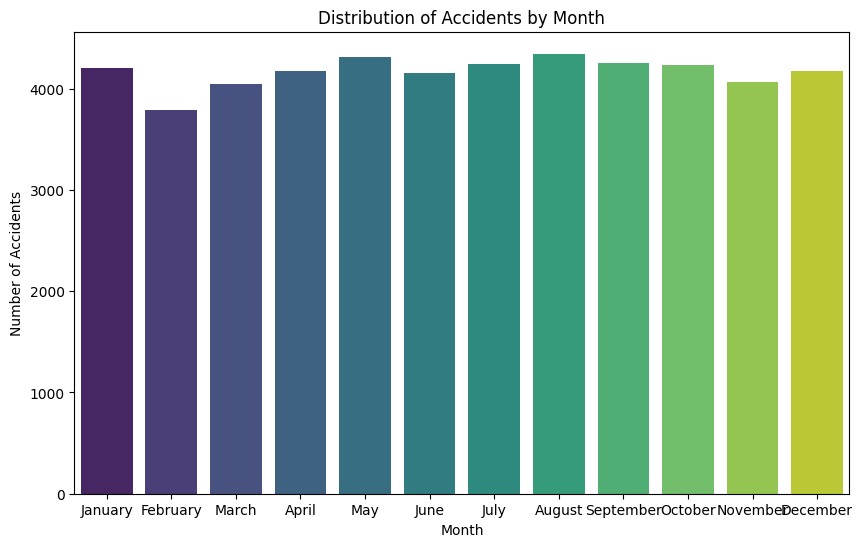

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribution of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_19492\3913378435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df, palette='viridis')


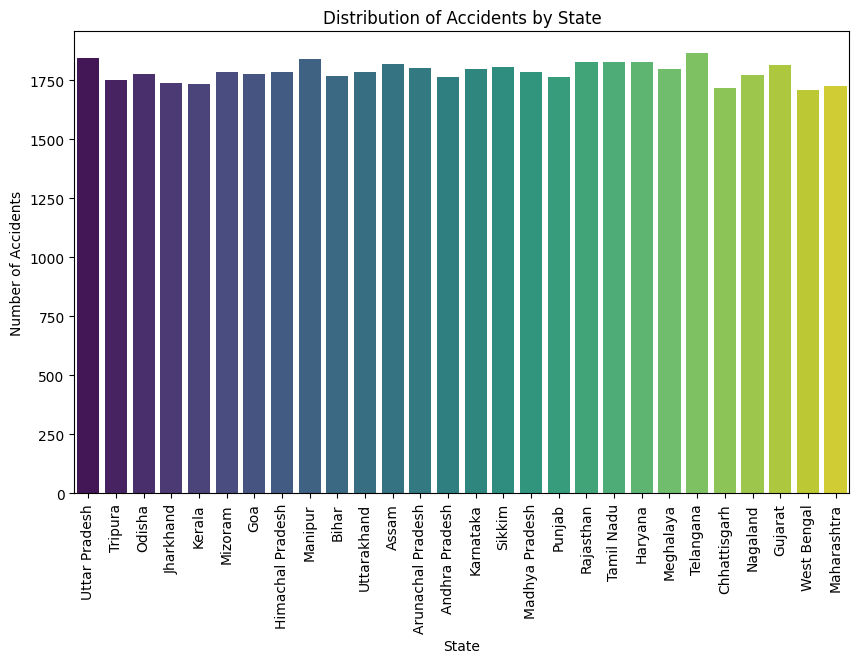

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, palette='viridis')
plt.title('Distribution of Accidents by State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


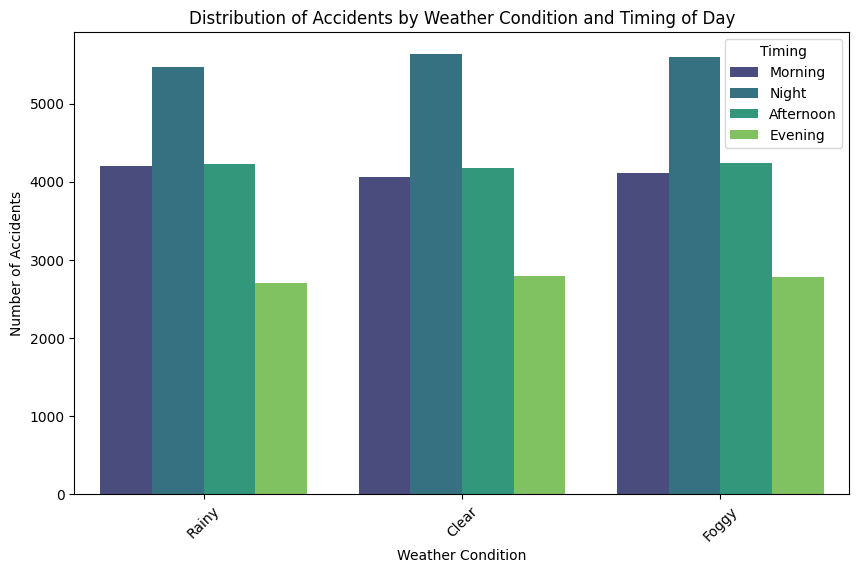

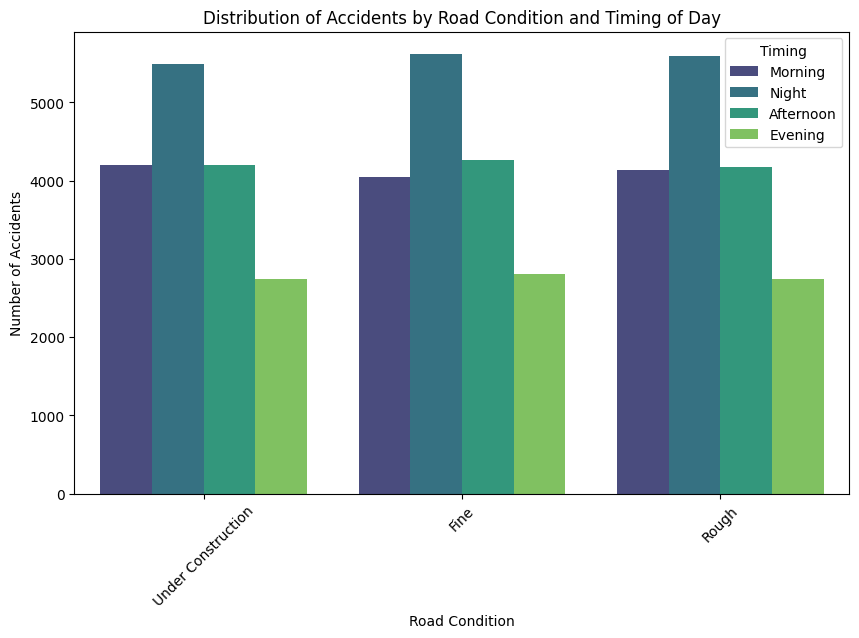

C:\Users\Vaidehi\AppData\Local\Temp\ipykernel_19492\2398809803.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis')


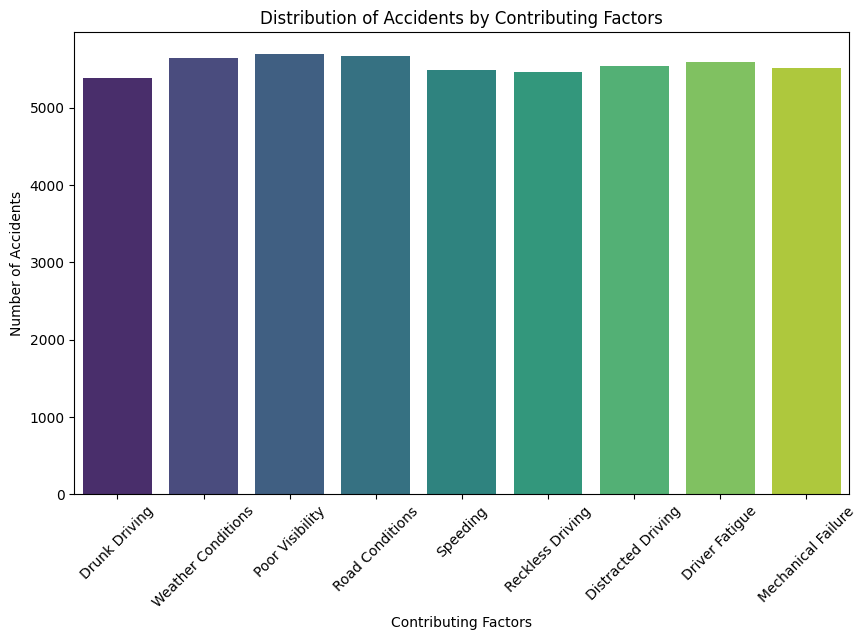

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WeatherCondition', hue='Timing', data=df, palette='viridis')
plt.title('Distribution of Accidents by Weather Condition and Timing of Day')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# By Road Condition and Timing of Day
plt.figure(figsize=(10, 6))
sns.countplot(x='RoadCondition', hue='Timing', data=df, palette='viridis')
plt.title('Distribution of Accidents by Road Condition and Timing of Day')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# By Contributing Factors
plt.figure(figsize=(10, 6))
sns.countplot(x='Reason', data=df, palette='viridis')
plt.title('Distribution of Accidents by Contributing Factors')
plt.xlabel('Contributing Factors')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

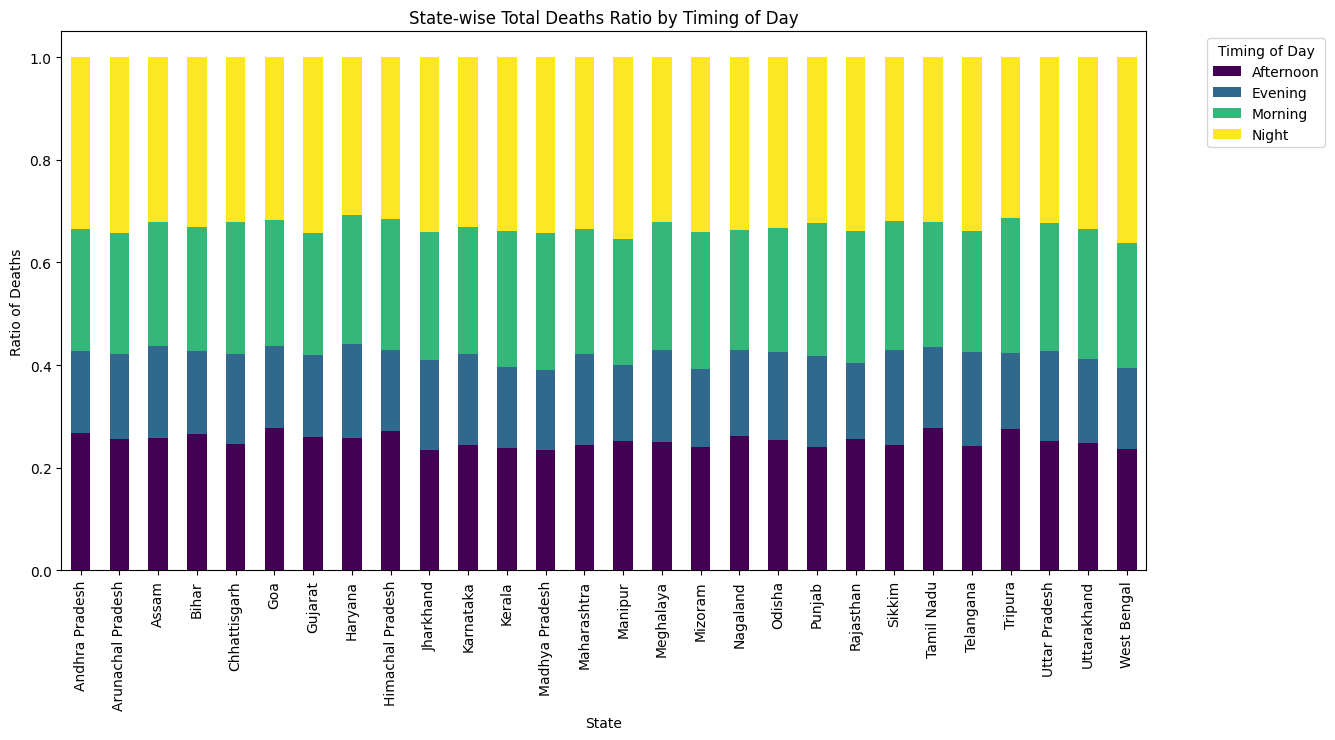

In [20]:
state_timing_deaths = df.groupby(['State', 'Timing'])['Deaths'].sum().unstack().fillna(0)
state_timing_deaths_ratio = state_timing_deaths.div(state_timing_deaths.sum(axis=1), axis=0)

state_timing_deaths_ratio.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('State-wise Total Deaths Ratio by Timing of Day')
plt.xlabel('State')
plt.ylabel('Ratio of Deaths')
plt.xticks(rotation=90)
plt.legend(title='Timing of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()